## Question

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Data (normally you would load this from JobOffer.xlsx, but I'll create the DataFrame directly)
data = {
    'Qualification': ['OL', 'AL', 'Degree', 'OL', 'Degree', 'AL', 'AL', 'OL', 'AL', 'Degree', 'OL', 'Degree', 'AL', 'AL', 'Degree'],
    'Experience': [10, 10, 5, 15, 15, 10, 8, 5, 8, 10, 3, 2, 3, 12, 4],
    'English': ['Good', 'Good', 'Good', 'Excellent', 'Excellent', 'Poor', 'Excellent', 'Poor', 'Good', 'Poor', 'Good', 'Excellent', 'Good', 'Good', 'Good'],
    'Age': [30, 30, 30, 33, 41, 30, 28, 25, 29, 35, 25, 27, 25, 45, 30],
    'Decision': ['No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No']
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

In [3]:
# Preprocessing: Convert categorical data into numeric values
df_encoded = pd.get_dummies(df[['Qualification', 'English']])
df_encoded['Experience'] = df['Experience']
df_encoded['Age'] = df['Age']

# Mapping decisions to binary values
decision_mapping = {'Yes': 1, 'No': 0}
df_encoded['Decision'] = df['Decision'].map(decision_mapping)

# Splitting the data into features (X) and target (y)
X = df_encoded.drop('Decision', axis=1)
y = df_encoded['Decision']

# Creating the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

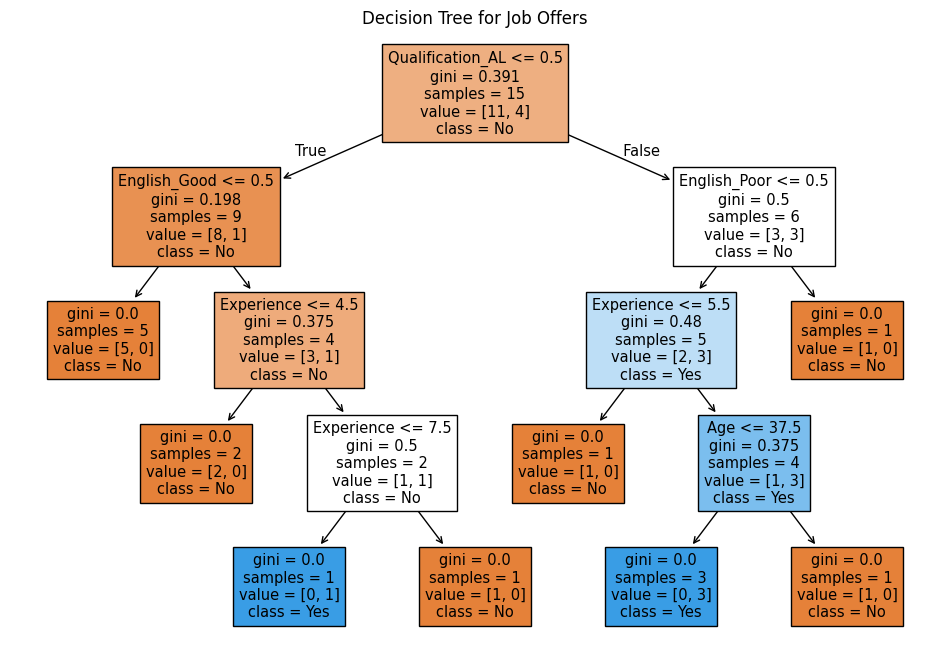

In [4]:
# Plotting the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Job Offers")
plt.show()

In [7]:
# Creating the new cases with the same feature names and order
new_cases = pd.DataFrame({
    'Qualification_AL': [1, 0], 'Qualification_Degree': [0, 0], 'Qualification_OL': [0, 1],
    'English_Excellent': [0, 1], 'English_Good': [1, 0], 'English_Poor': [0, 0],
    'Experience': [10, 15], 'Age': [30, 35]
}, columns=X.columns)  # Ensure the columns are in the same order

# Predicting the decisions for the new cases
predictions = model.predict(new_cases)
predictions_decoded = ['Yes' if pred == 1 else 'No' for pred in predictions]


# Displaying the predictions
print(f"Decision for AL, 10 years experience, Good English, Age 30: {predictions_decoded[0]}")
print(f"Decision for OL, 15 years experience, Excellent English, Age 35: {predictions_decoded[1]}")

Decision for AL, 10 years experience, Good English, Age 30: Yes
Decision for OL, 15 years experience, Excellent English, Age 35: No
